In [2]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
from sklearn.feature_extraction import _stop_words


In [2]:
import pandas as pd
import re
import string
import numpy as np

In [4]:
!unzip "/content/archive (8).zip" -d "/content/spamdata/"

Archive:  /content/archive (8).zip
replace /content/spamdata/combined_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
data = pd.read_csv("/content/spamdata/combined_data.csv",encoding = "'latin'")

In [17]:
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [7]:
data["text"] = data.text
data["spam"] = data.label

In [18]:
from sklearn.model_selection import train_test_split
emails_train, emails_test, target_train, target_test = train_test_split(data.text,data.label,test_size = 0.2)

In [19]:
data.info

<bound method DataFrame.info of        label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
83443      0  hi given a date how do i get the last date of ...
83444      1  now you can order software on cd or download i...
83445      1  dear valued member canadianpharmacy provides a...
83446      0  subscribe change profile contact us long term ...
83447      1  get the most out of life ! viagra has helped m...

[83448 rows x 2 columns]>

In [21]:
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [22]:
emails_train.shape

(66758,)

In [23]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')



def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

x_train = [clean_up_pipeline(o) for o in emails_train]
x_test = [clean_up_pipeline(o) for o in emails_test]

x_train[0]

'someone with more experience could certainly provide a more precise answer but basically you came across something called generic functions in r this concept allows mean to be called on various data structures without extra care see usemethod methods mean getanywhere mean default for more details see the r language definition manual petr ebi napsal a dear sir in case of looking at the codes of the fuction cov we find all the codings below but incase of mean we dont find the contents please show me the way to look at all the codings of any functions best regards kei cov function x y null use all obs method c pearson kendall spearman na method pmatch use c all obs complete obs pairwise complete obs method match arg method if is data frame y y as matrix y else stopifnot is atomic y if is data frame x x as matrix x else stopifnot is atomic x if is matrix x if is null y stop supply both x and y or a matrix like x x as vector x if method pearson internal cov x y na method method kendall els

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(target_train.values)
test_y = le.transform(target_test.values)

In [25]:
train_y

array([0, 1, 1, ..., 1, 1, 0])

Tokenize

In [26]:
## some config values
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

In [27]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features[0]


<ipython-input-27-6103b351f173>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
<ipython-input-27-6103b351f173>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_features = np.array(tokenizer.texts_to_sequences(x_test))


[820,
 17,
 43,
 759,
 119,
 1908,
 144,
 6,
 43,
 6793,
 959,
 38,
 2928,
 10,
 915,
 1162,
 349,
 661,
 562,
 1157,
 7,
 34,
 15,
 3553,
 1959,
 719,
 3,
 18,
 661,
 14,
 1311,
 88,
 4553,
 290,
 1200,
 853,
 94,
 49666,
 1229,
 719,
 719,
 815,
 9,
 43,
 579,
 94,
 2,
 34,
 1296,
 3319,
 2305,
 5895,
 10092,
 6,
 327,
 2028,
 7,
 325,
 5,
 280,
 25,
 2,
 4243,
 5,
 2,
 14983,
 28,
 201,
 35,
 2,
 356,
 38,
 31692,
 5,
 719,
 28,
 191,
 201,
 2,
 2094,
 51,
 355,
 60,
 2,
 165,
 3,
 225,
 25,
 35,
 2,
 5,
 61,
 1157,
 174,
 417,
 8722,
 14983,
 240,
 49,
 182,
 352,
 91,
 35,
 6510,
 707,
 37,
 8682,
 17260,
 19648,
 439,
 707,
 27446,
 91,
 37,
 35,
 6510,
 589,
 6510,
 17019,
 589,
 6510,
 707,
 1178,
 3497,
 707,
 30,
 11,
 88,
 872,
 182,
 182,
 20,
 816,
 182,
 496,
 25901,
 11,
 8593,
 182,
 30,
 11,
 88,
 872,
 49,
 49,
 20,
 816,
 49,
 496,
 25901,
 11,
 8593,
 49,
 30,
 11,
 816,
 49,
 30,
 11,
 352,
 182,
 503,
 1392,
 326,
 49,
 4,
 182,
 27,
 6,
 816,
 84,
 49,
 49,
 20,


Padding

In [28]:
from keras.preprocessing.sequence import pad_sequences
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_train_features[0]

array([  0,   0,   0, ..., 220, 258, 117], dtype=int32)

Model

In [29]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

In [33]:
# create the model
import tensorflow as tf
embedding_vecor_length = 32

model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2000, 32)          1600000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               49664     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1651745 (6.30 MB)
Trainable params: 1651745 (6.30 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [34]:
history = model.fit(x_train_features, train_y, batch_size=512, epochs=6, validation_data=(x_test_features, test_y))

Epoch 1/6
131/131 [==============================] - 91s 664ms/step - loss: 0.2647 - accuracy: 0.8770 - val_loss: 0.0524 - val_accuracy: 0.9849
Epoch 2/6
131/131 [==============================] - 51s 390ms/step - loss: 0.0449 - accuracy: 0.9871 - val_loss: 0.0407 - val_accuracy: 0.9889
Epoch 3/6
131/131 [==============================] - 46s 353ms/step - loss: 0.0302 - accuracy: 0.9926 - val_loss: 0.0395 - val_accuracy: 0.9885
Epoch 4/6
131/131 [==============================] - 46s 351ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0384 - val_accuracy: 0.9877
Epoch 5/6
131/131 [==============================] - 45s 347ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.0390 - val_accuracy: 0.9889
Epoch 6/6
131/131 [==============================] - 46s 348ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0414 - val_accuracy: 0.9896


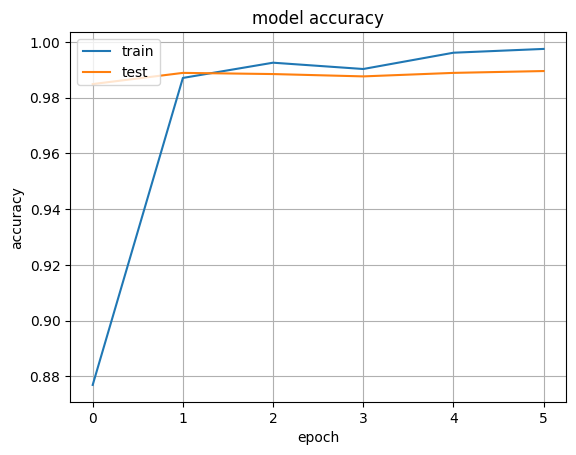

In [35]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [43]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

522/522 [==============================] - 24s 46ms/step


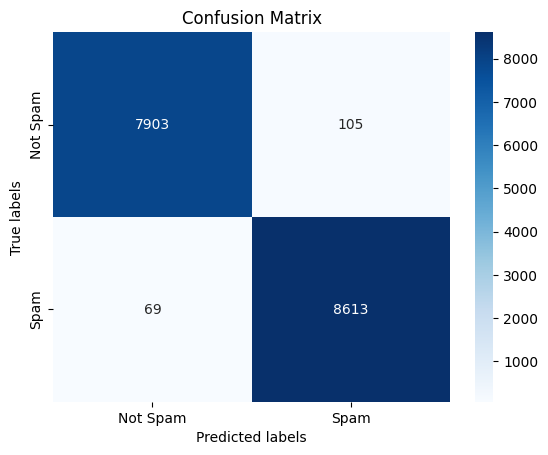

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix =confusion_matrix(test_y,y_predict)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [45]:
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()

In [46]:
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 98.80%
Recall: 99.21%
F1 Score: 99.00%


In [47]:
f1_score(test_y,y_predict)

0.99